In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [16]:
df = pd.read_csv(r'Megy_final.csv')

In [17]:
list_to_remove = ["x","y","z"]
df = df.drop(columns=list_to_remove, errors='ignore')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   space_group_core   1899 non-null   int64  
 1   space_group_shell  1899 non-null   int64  
 2   Tc                 1899 non-null   int64  
 3   shape              1899 non-null   int64  
 4   temperature_k      1899 non-null   float64
 5   h_range_max_koe    1899 non-null   float64
 6   sat_em_g           1899 non-null   float64
 7   coer_oe            1899 non-null   float64
 8   mr (emu/g)         1899 non-null   float64
 9   sphericity         1899 non-null   float64
 10  max/min            1899 non-null   float64
 11  area/volume        1899 non-null   float64
 12  num_of_magn_ions   1899 non-null   float64
 13  core_b             1899 non-null   float64
 14  core_alpha         1899 non-null   float64
 15  core_beta          1899 non-null   float64
 16  core_gamma         1899 

In [19]:
# Ваш текущий DataFrame df должен быть определен
rename_dict = {
    'space_group_core': 'space group of core',
    'space_group_shell': 'space group of shell',
    'Tc': 'Curie temperature',
    'shape': 'Shape',
    'temperature_k': 'Experimental temperature',
    'h_range_max_koe': 'Maximum field range',
    'sat_em_g': 'Saturation magnetization',
    'coer_oe': 'Coercivity',
    'mr (emu/g)': 'Remanent magnetization',
    'sphericity': 'Sphericity',
    'max/min': 'Geometric anisotropy',
    'area/volume': 'Area to volume ratio',
    'num_of_magn_ions': 'Number of magnetic ions',
    'core_b': 'Core b lattice parameter',
    'core_alpha': 'Core alpha angle',
    'core_beta': 'Core beta angle',
    'core_gamma': 'Core gamma angle',
    'shell_b': 'Shell b lattice parameter',
    'shell_alpha': 'Shell alpha angle',
    'shell_beta': 'Shell beta angle',
    'shell_gamma': 'Shell gamma angle',
    'Aex': 'Exchange stiffness coefficient',
    'core_c/a': 'Core lattice ratio c to a',
    'shell_c/a': 'Shell lattice ratio c to a',
    'link': 'Link',
    'orig_c1': 'Formula of core',
    'orig_c2': 'Formula of shell'
}

# Переименование столбцов в DataFrame
df.rename(columns=rename_dict, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   space group of core             1899 non-null   int64  
 1   space group of shell            1899 non-null   int64  
 2   Curie temperature               1899 non-null   int64  
 3   Shape                           1899 non-null   int64  
 4   Experimental temperature        1899 non-null   float64
 5   Maximum field range             1899 non-null   float64
 6   Saturation magnetization        1899 non-null   float64
 7   Coercivity                      1899 non-null   float64
 8   Remanent magnetization          1899 non-null   float64
 9   Sphericity                      1899 non-null   float64
 10  Geometric anisotropy            1899 non-null   float64
 11  Area to volume ratio            1899 non-null   float64
 12  Number of magnetic ions         18

In [21]:
# Save the removed columns in a separate DataFrame
removed_columns_df = df[['Formula of core', 'Formula of shell', 'Link']]

# Drop unnecessary columns before scaling
df = df.drop(columns=removed_columns_df)

In [22]:
df

,space group of core,space group of shell,Curie temperature,Shape,Experimental temperature,Maximum field range,Saturation magnetization,Coercivity,Remanent magnetization,Sphericity,...,Core alpha angle,Core beta angle,Core gamma angle,Shell b lattice parameter,Shell alpha angle,Shell beta angle,Shell gamma angle,Exchange stiffness coefficient,Core lattice ratio c to a,Shell lattice ratio c to a
0,225,227,850,1,5.0,50.0,83.14,7800.00,43.2642,1.0,...,107.294951,89.502583,120.037844,5.960108,119.97187,119.806604,90.192014,35.479001,1.757954,1.0
1,227,0,397,1,300.0,10.0,2.29,24.80,0.0078,1.0,...,90.000000,60.000000,120.000000,0.000000,0.00000,0.000000,0.000000,9.919758,1.000000,0.0
2,227,0,397,1,300.0,10.0,2.43,90.20,0.0218,1.0,...,90.000000,60.000000,120.000000,0.000000,0.00000,0.000000,0.000000,9.919758,1.000000,0.0
3,227,0,397,1,300.0,10.0,16.15,40.07,0.3498,1.0,...,90.000000,60.000000,120.000000,0.000000,0.00000,0.000000,0.000000,9.919758,1.000000,0.0
4,227,0,397,1,300.0,10.0,18.75,47.13,0.6546,1.0,...,90.000000,60.000000,120.000000,0.000000,0.00000,0.000000,0.000000,9.919758,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,227,0,600,1,124.6,52.0,26.80,99.10,0.5000,1.0,...,55.607474,55.607474,21.926185,0.000000,0.00000,0.000000,0.000000,25.317130,1.195642,0.0
1895,227,0,600,1,124.6,52.0,31.00,74.70,0.5000,1.0,...,55.607474,55.607474,21.926185,0.000000,0.00000,0.000000,0.000000,25.317130,1.195642,0.0
1896,227,0,600,1,124.6,52.0,33.70,66.90,0.6000,1.0,...,55.607474,55.607474,21.926185,0.000000,0.00000,0.000000,0.000000,25.317130,1.195642,0.0
1897,227,0,600,1,124.6,47.0,64.30,37.80,1.8000,1.0,...,55.607474,55.607474,21.926185,0.000000,0.00000,0.000000,0.000000,25.317130,1.195642,0.0


In [23]:
# Get descriptive statistics for both numerical and categorical columns
statistics = df.describe(include='all')
print(statistics)

       space group of core  space group of shell  Curie temperature  \
count          1899.000000           1899.000000        1899.000000   
mean            193.875197             90.552923         730.468141   
std              56.131485            104.193029         241.478458   
min               2.000000              0.000000          30.000000   
25%             194.000000              0.000000         627.000000   
50%             225.000000              0.000000         751.000000   
75%             227.000000            225.000000         858.000000   
max             229.000000            229.000000        1659.000000   

             Shape  Experimental temperature  Maximum field range  \
count  1899.000000               1899.000000          1899.000000   
mean      1.448657                154.580053            35.153839   
std       1.137016                139.147729            37.275266   
min       1.000000                  1.800000             0.100000   
25%       1.000

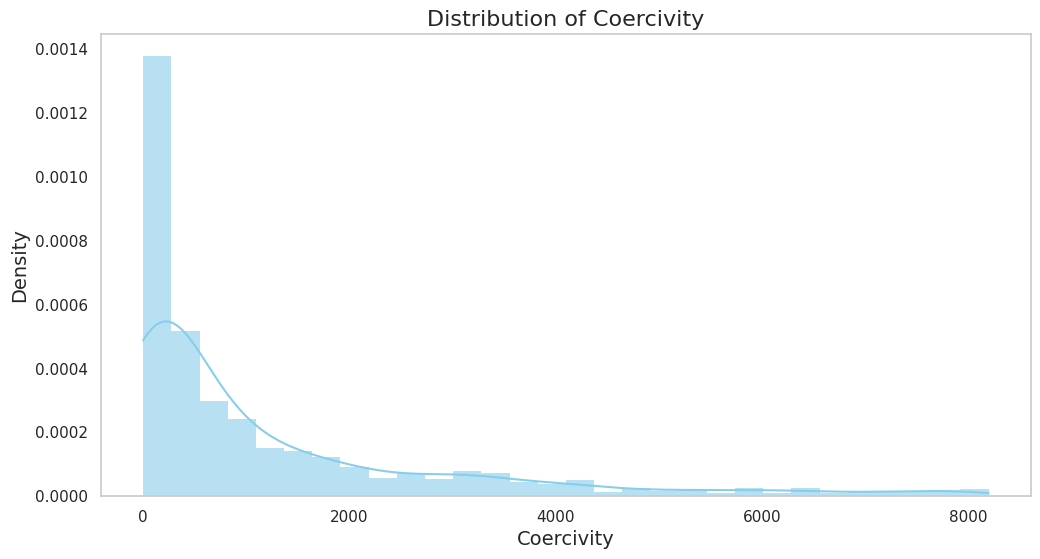

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# Plot the distribution using a histogram and KDE
sns.histplot(df['Coercivity'], bins=30, kde=True, color='skyblue',
             stat='density', linewidth=0, alpha=0.6)

# Customize the title and labels
plt.title('Distribution of Coercivity', fontsize=16)
plt.xlabel('Coercivity', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a grid for better readability
plt.grid(False)

# Show the plot
plt.show()

Since it is evident that the exchange bias shift follows an exponential distribution, it will be necessary to transform the target variable using the decimal logarithm when training machine learning models.

In [25]:
df.columns

Index(['space group of core', 'space group of shell', 'Curie temperature',
       'Shape', 'Experimental temperature', 'Maximum field range',
       'Saturation magnetization', 'Coercivity', 'Remanent magnetization',
       'Sphericity', 'Geometric anisotropy', 'Area to volume ratio',
       'Number of magnetic ions', 'Core b lattice parameter',
       'Core alpha angle', 'Core beta angle', 'Core gamma angle',
       'Shell b lattice parameter', 'Shell alpha angle', 'Shell beta angle',
       'Shell gamma angle', 'Exchange stiffness coefficient',
       'Core lattice ratio c to a', 'Shell lattice ratio c to a'],
      dtype='object')

# Voilin plots

In [26]:
# List of columns to be converted to categorical type
categorical_columns = ['Maximum field range', 'Shape', 'Sphericity']

# Convert the specified columns to categorical type
df[categorical_columns] = df[categorical_columns].astype('float64')

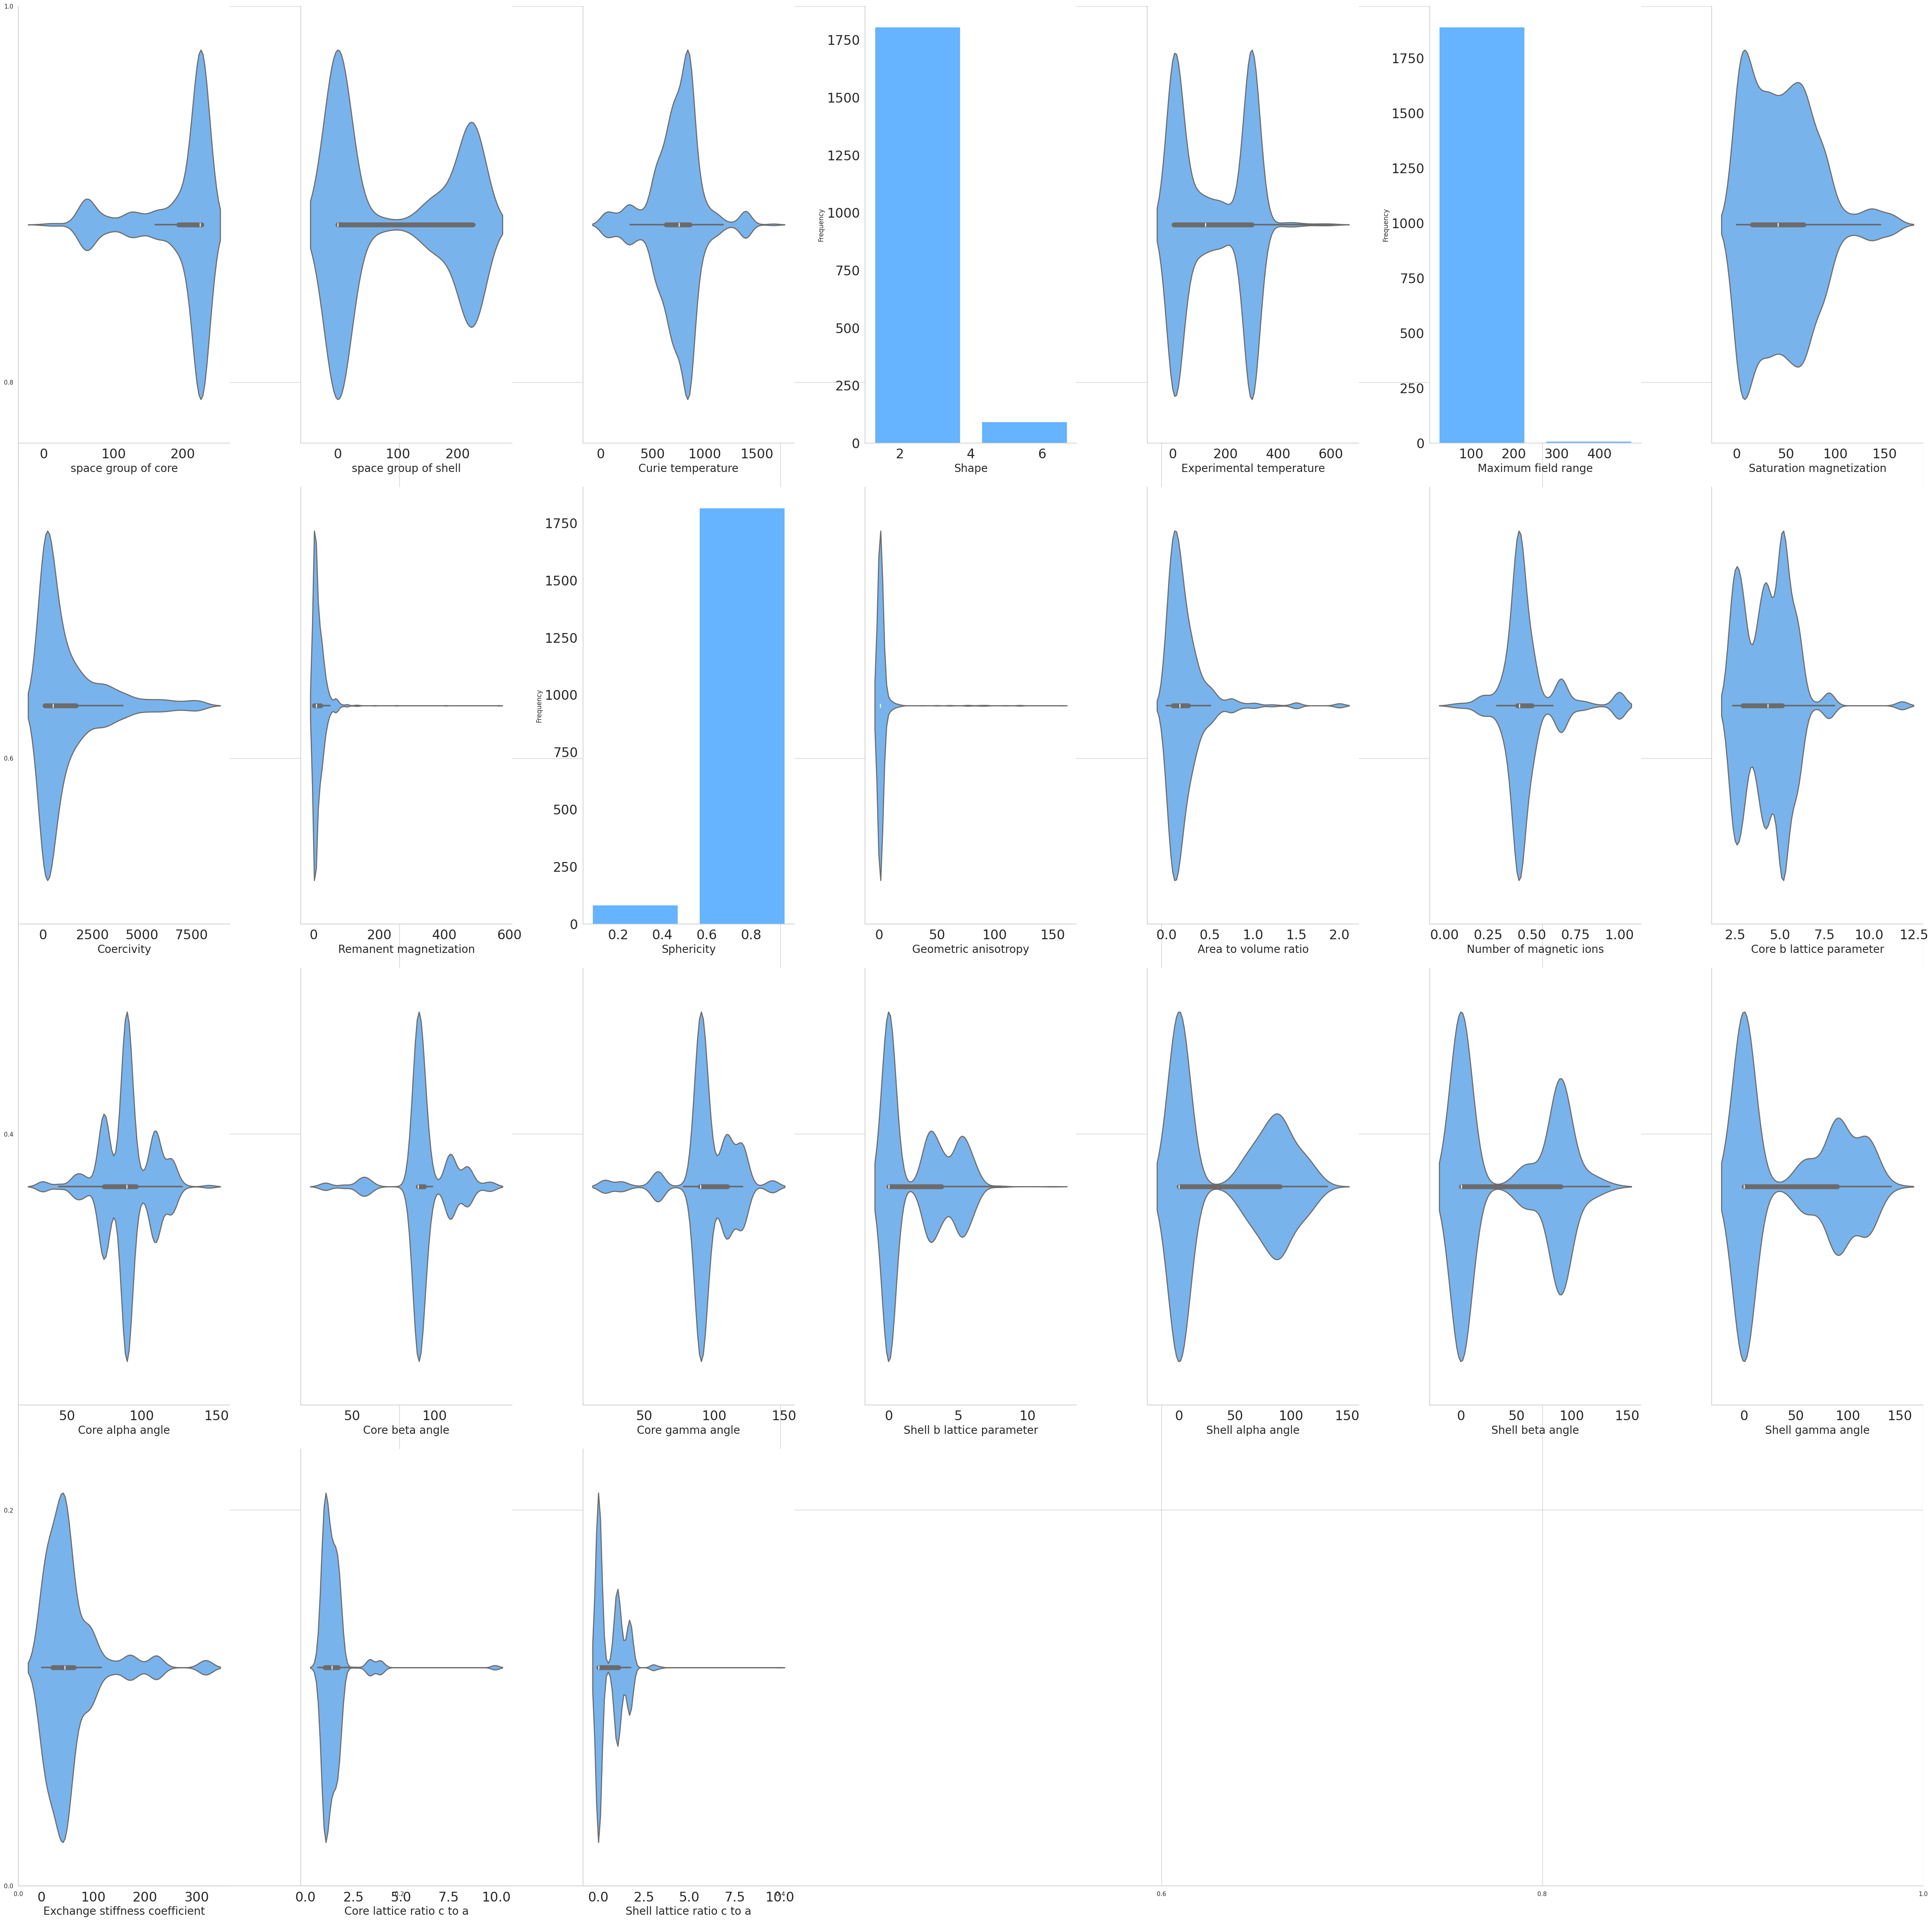

In [28]:
# Assuming that the DataFrame df and the list categorical_columns are already defined
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f']

k = 1
f, ax = plt.subplots(figsize=(50, 50))  # Figure size
num_columns = len(df.columns)
num_rows = (num_columns // 7) + 1  # Number of rows based on the number of plots

for i in df.columns:
    plt.subplot(num_rows, 7, k)  # Increased the number of plots per row to 7
    if i in categorical_columns:  # If it is a categorical parameter, draw a histogram
        df[i].plot.hist(bins=2, color='#66b3ff', rwidth=0.8)  # Reduced rwidth for compactness
        plt.xlabel(f'{i}', fontsize=20, family='sans-serif')  # Font size
    else:  # Otherwise, draw a violin plot
        sns.violinplot(x=df[i], color='#66b3ff', linewidth=2)
        plt.xlabel(f'{i}', fontsize=20, family='sans-serif')  # Font size

    plt.tick_params(axis='both', labelsize=24, width=2)  # Label size
    plt.grid(False)  # Remove grid
    sns.despine()  # Remove vertical lines

    k += 1

# Adjusting for a denser arrangement of plots with increased vertical spacing
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)  # Reduced padding for greater compactness
plt.show()

# Correlation Matrix

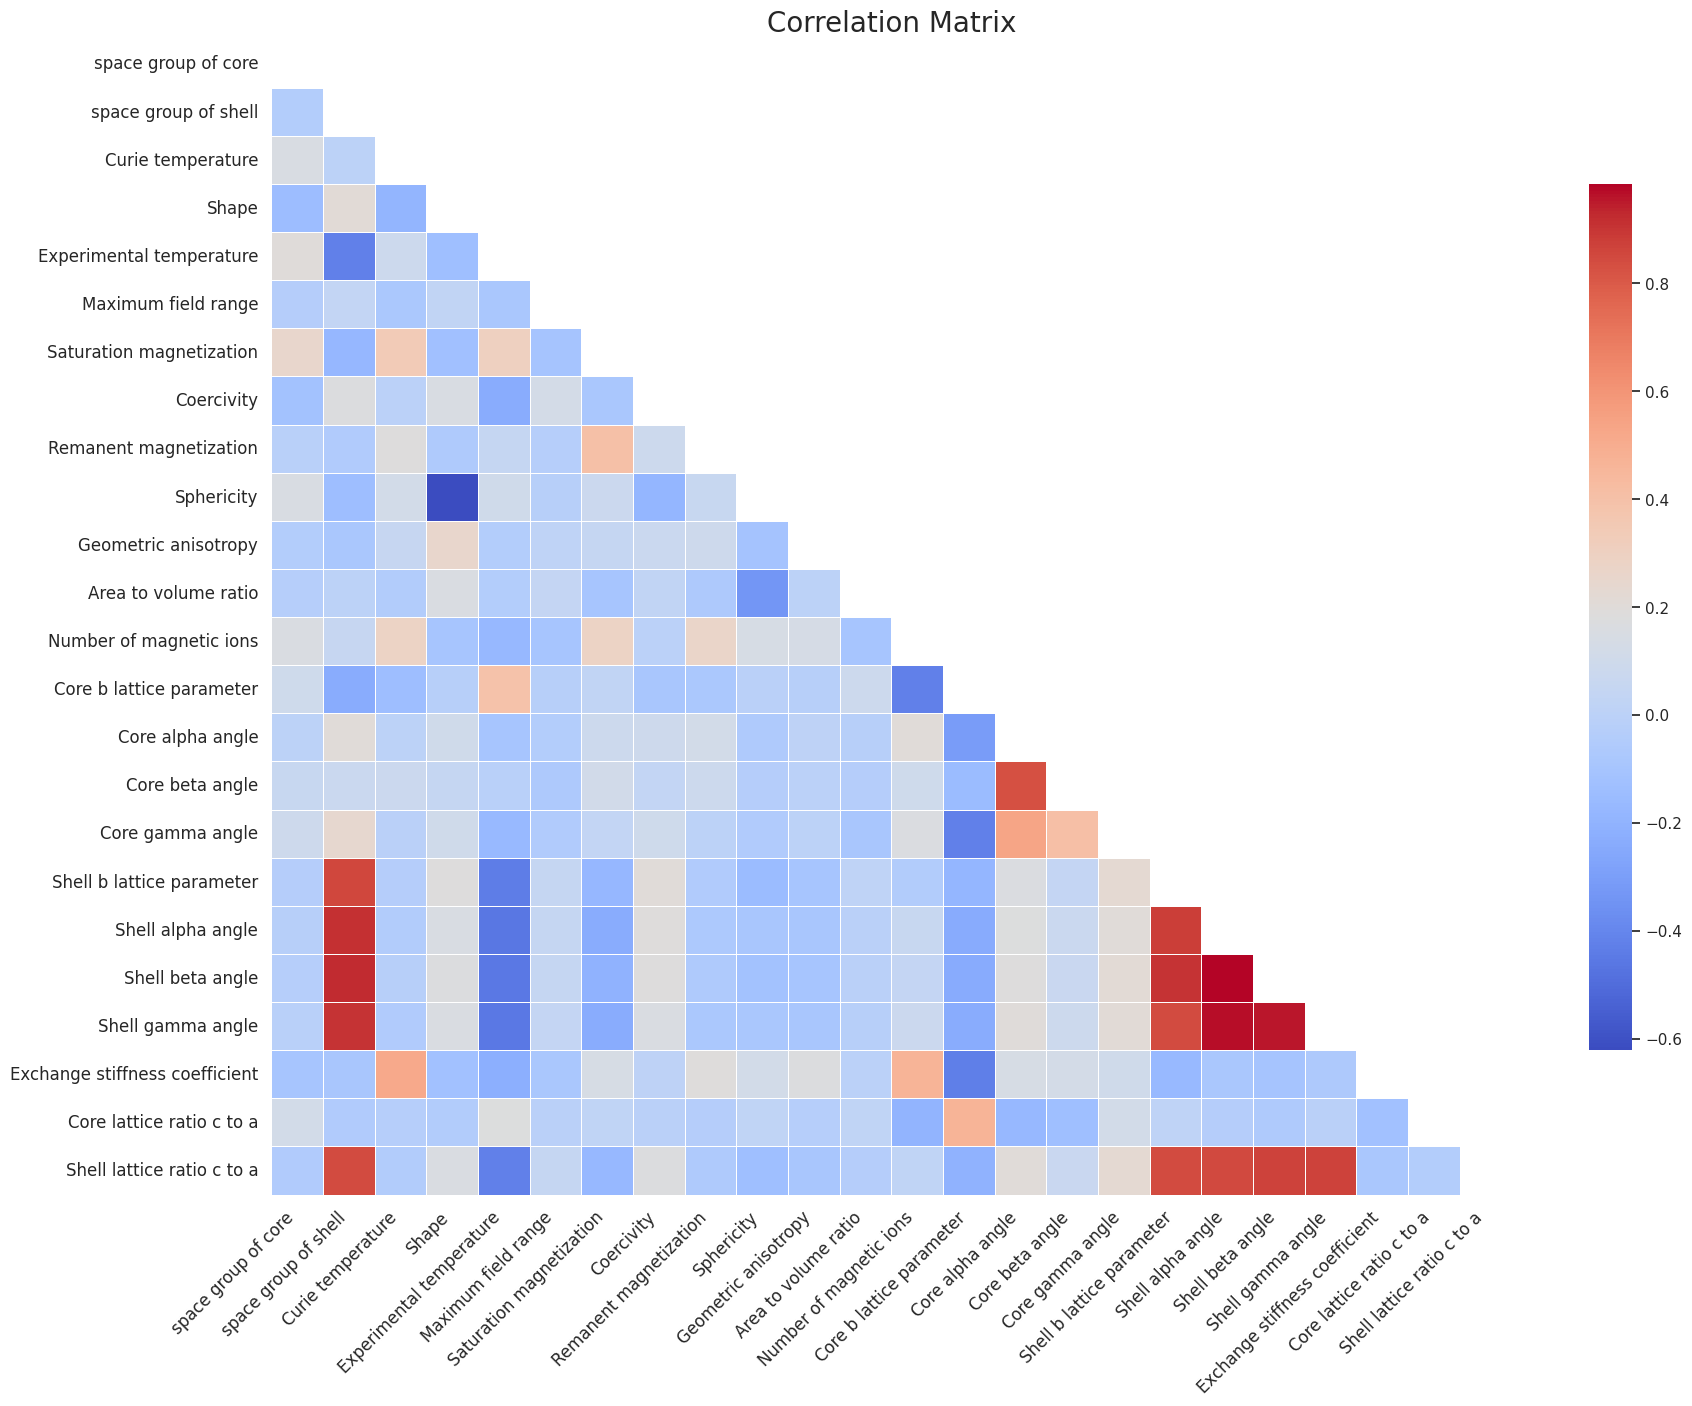

In [29]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Increase the figure size for better display
plt.figure(figsize=(20, 15))

# Plot the heatmap of the correlation matrix without annotations and grid lines
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap="coolwarm",
            linewidths=0.5, square=False, cbar_kws={"shrink": .75},
            linecolor=None)  # Ensure linecolor is None to remove any grid lines

# Set the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for better visibility
plt.yticks(rotation=0, fontsize=12)  # Keep y labels horizontal for consistency

# Set the title of the plot
plt.title('Correlation Matrix', fontsize=20)

# Add a grid for better readability
plt.grid(False)

# Show the plot
plt.show()